<a href="https://colab.research.google.com/github/seyeon0815/Project/blob/main/%ED%98%BC%EA%B3%B5%EB%A8%B8%EC%8B%A0_ch09_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# LSTM 신경망 훈련하기
- RNN은 실무에서 사용 x
- 문장이 길면 학습 능력이 떨어짐
- Long short-Term Meomory
- 단기 기억을 오래 기억하기 위해 고안됨
- 셀 안에 작은 셀을 만든다(메모장에 적어뒀다가 

In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = imdb.load_data(
    num_words=500)

train_input, val_input, train_target, val_target = train_test_split(
    train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


## padding

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

train_seq = pad_sequences(train_input, maxlen=100)
val_seq= pad_sequences(val_input, maxlen=100)

# 모형 만들기

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500,167,input_length=100))
model.add(keras.layers.LSTM(8)) #SimpleRNN
model.add(keras.layers.Dense(1,activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 100, 167)          83500     
                                                                 
 lstm (LSTM)                 (None, 8)                 5632      
                                                                 
 dense (Dense)               (None, 1)                 9         
                                                                 
Total params: 89,141
Trainable params: 89,141
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', 
              metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

history = model.fit(train_seq, train_target, epochs=10, batch_size=64, #epochs=100
                    validation_data=(val_seq, val_target),
                    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/10
313/313 [==============================] - 20s 59ms/step - loss: 0.3981 - accuracy: 0.8246 - val_loss: 0.4380 - val_accuracy: 0.7996
Epoch 2/10
313/313 [==============================] - 17s 55ms/step - loss: 0.3961 - accuracy: 0.8251 - val_loss: 0.4312 - val_accuracy: 0.8012
Epoch 3/10
313/313 [==============================] - 18s 56ms/step - loss: 0.3943 - accuracy: 0.8254 - val_loss: 0.4363 - val_accuracy: 0.8000
Epoch 4/10
313/313 [==============================] - 18s 56ms/step - loss: 0.3940 - accuracy: 0.8249 - val_loss: 0.4348 - val_accuracy: 0.7976
Epoch 5/10
313/313 [==============================] - 18s 58ms/step - loss: 0.3925 - accuracy: 0.8258 - val_loss: 0.4355 - val_accuracy: 0.8016


# 손실 곡선 추가

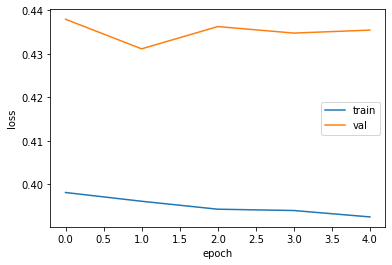

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','val'])
plt.show()

# 순환층에 드롭아웃 적용하기

Epoch 1/10
313/313 [==============================] - 16s 44ms/step - loss: 0.6924 - accuracy: 0.5514 - val_loss: 0.6917 - val_accuracy: 0.6016
Epoch 2/10
313/313 [==============================] - 13s 42ms/step - loss: 0.6903 - accuracy: 0.6140 - val_loss: 0.6886 - val_accuracy: 0.6390
Epoch 3/10
313/313 [==============================] - 13s 42ms/step - loss: 0.6844 - accuracy: 0.6454 - val_loss: 0.6782 - val_accuracy: 0.6642
Epoch 4/10
313/313 [==============================] - 13s 42ms/step - loss: 0.6478 - accuracy: 0.6658 - val_loss: 0.6144 - val_accuracy: 0.7144
Epoch 5/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5965 - accuracy: 0.7207 - val_loss: 0.5859 - val_accuracy: 0.7280
Epoch 6/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5709 - accuracy: 0.7325 - val_loss: 0.5628 - val_accuracy: 0.7386
Epoch 7/10
313/313 [==============================] - 13s 42ms/step - loss: 0.5500 - accuracy: 0.7461 - val_loss: 0.5402 - val_accuracy:

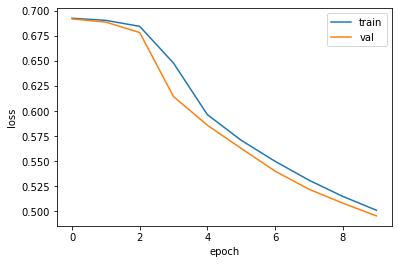

In [ ]:
model2 = keras.Sequential()

model2.add(keras.layers.Embedding(500, 16, input_length=100))
# 드롭아웃 추가
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', 
               metrics=['accuracy'])

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5', 
                                                save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,
                                                  restore_best_weights=True)

# epcohs = 100
history = model2.fit(train_seq, train_target, epochs=10, batch_size=64,
                     validation_data=(val_seq, val_target),
                     callbacks=[checkpoint_cb, early_stopping_cb])

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()